In [60]:
# Import dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [30]:
# create engine to historical prices sqlite db
engine = create_engine("sqlite:///test.sqlite")

In [31]:
eur_usd_df = pd.read_sql('select * from eur_usd',engine)
cad_usd_df = pd.read_sql('select * from cad_usd', engine)
jpy_usd_df = pd.read_sql('select * from jpy_usd', engine)

In [32]:
# eur_usd_df[' Close']
def MA5(table):
    counter = 0
    avg5_list = []
    for x in table[' Close']:
        if(counter>4):
            avg5 = np.average([table[' Close'][counter - 5],
                               table[' Close'][counter - 4],
                               table[' Close'][counter - 3],
                               table[' Close'][counter - 2],
                               table[' Close'][counter - 1]])
            avg5_list.append(avg5)
        else:
            avg5_list.append(None)
        counter += 1

    return avg5_list


In [ ]:
eur_usd_df[' MA5'] = MA5(eur_usd_df)
cad_usd_df[' MA5'] = MA5(cad_usd_df)
jpy_usd_df[' MA5'] = MA5(jpy_usd_df)
# print(jpy_usd_df[0:10])

       Date    Open    High     Low   Close      MA5
0  01/01/24  141.03  141.41  140.82  140.88      NaN
1  01/02/24  140.88  142.22  140.82  141.99      NaN
2  01/03/24  141.99  143.73  141.86  143.28      NaN
3  01/04/24  143.29  144.85  142.87  144.63      NaN
4  01/05/24  144.63  145.96  143.81  144.62      NaN
5  01/08/24  144.63  144.93  143.66  144.23  143.080
6  01/09/24  144.28  144.62  143.44  144.48  143.750
7  01/10/24  144.48  145.85  144.32  145.76  144.248
8  01/11/24  145.72  146.42  145.26  145.28  144.744
9  01/12/24  145.43  145.57  144.36  144.82  144.874


In [37]:
def MA8(table):
    counter = 0
    avg8_list = []
    for x in table[' Close']:
        if(counter>7):
            avg8 = np.average([table[' Close'][counter - 8],
                               table[' Close'][counter - 7],
                               table[' Close'][counter - 6],
                               table[' Close'][counter - 5],
                               table[' Close'][counter - 4],
                               table[' Close'][counter - 3],
                               table[' Close'][counter - 2],
                               table[' Close'][counter - 1]])
            avg8_list.append(avg8)
        else:
            avg8_list.append(None)
        counter += 1

    return avg8_list

In [ ]:
eur_usd_df[' MA8'] = MA8(eur_usd_df)
cad_usd_df[' MA8'] = MA8(cad_usd_df)
jpy_usd_df[' MA8'] = MA8(jpy_usd_df)
# jpy_usd_df[0:12]

Date    Open    High     Low   Close      MA5        MA8
0   01/01/24  141.03  141.41  140.82  140.88      NaN        NaN
1   01/02/24  140.88  142.22  140.82  141.99      NaN        NaN
2   01/03/24  141.99  143.73  141.86  143.28      NaN        NaN
3   01/04/24  143.29  144.85  142.87  144.63      NaN        NaN
4   01/05/24  144.63  145.96  143.81  144.62      NaN        NaN
5   01/08/24  144.63  144.93  143.66  144.23  143.080        NaN
6   01/09/24  144.28  144.62  143.44  144.48  143.750        NaN
7   01/10/24  144.48  145.85  144.32  145.76  144.248        NaN
8   01/11/24  145.72  146.42  145.26  145.28  144.744  143.73375
9   01/12/24  145.43  145.57  144.36  144.82  144.874  144.28375
10  01/15/24  144.87  145.96  144.85  145.75  144.914  144.63750
11  01/16/24  145.74  147.31  145.59  147.19  145.218  144.94625

In [41]:
def MA13(table):
    counter = 0
    avg13_list = []
    for x in table[' Close']:
        if(counter>12):
            avg13 = np.average([table[' Close'][counter - 13],
                                table[' Close'][counter - 12],
                                table[' Close'][counter - 11],
                                table[' Close'][counter - 10],
                                table[' Close'][counter - 9],
                                table[' Close'][counter - 8],
                                table[' Close'][counter - 7],
                                table[' Close'][counter - 6],
                                table[' Close'][counter - 5],
                                table[' Close'][counter - 4],
                                table[' Close'][counter - 3],
                                table[' Close'][counter - 2],
                                table[' Close'][counter - 1]])
            avg13_list.append(avg13)
        else:
            avg13_list.append(None)
        counter += 1

    return avg13_list

In [45]:
eur_usd_df[' MA13'] = MA13(eur_usd_df)
cad_usd_df[' MA13'] = MA13(cad_usd_df)
jpy_usd_df[' MA13'] = MA13(jpy_usd_df)
# jpy_usd_df[0:15]

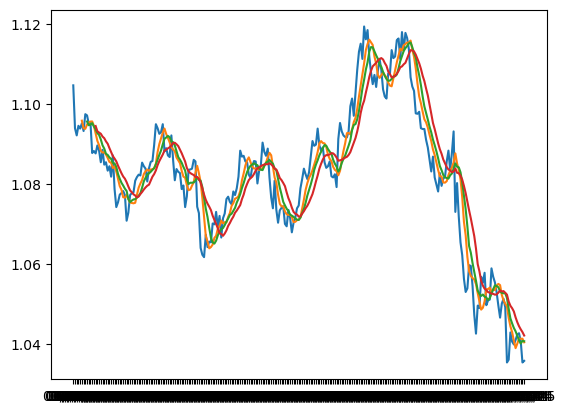

<Figure size 55000x55000 with 0 Axes>

In [46]:
plt.plot(eur_usd_df['Date'], eur_usd_df[' Close'], label='Close')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA5'], label= 'MA5')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA8'], label= 'MA8')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA13'], label= 'MA13')
plt.figure(figsize=(550,550))
plt.show()

In [47]:
def setup_buy_col(table):
        buy = []
        for row in eur_usd_df.iterrows():
                buy.append('Closed')
        return buy

def setup_prof_col(table):
        profit = []
        for row in eur_usd_df.iterrows():
                profit.append(0)
        return profit


In [48]:
eur_usd_df['Buy'] = setup_buy_col(eur_usd_df)
eur_usd_df['Profit'] = setup_prof_col(eur_usd_df)

cad_usd_df['Buy'] = setup_buy_col(cad_usd_df)
cad_usd_df['Profit'] = setup_prof_col(cad_usd_df)

jpy_usd_df['Buy'] = setup_buy_col(jpy_usd_df)
jpy_usd_df['Profit'] = setup_prof_col(jpy_usd_df)

In [50]:
eur_usd_df[30:60]

Date    Open    High     Low   Close      MA5       MA8      MA13  \
30  02/12/24  1.0781  1.0808  1.0756  1.0773  1.07666  1.078900  1.081392   
31  02/13/24  1.0772  1.0804  1.0700  1.0709  1.07726  1.078325  1.080523   
32  02/14/24  1.0712  1.0736  1.0695  1.0729  1.07634  1.076288  1.079446   
33  02/15/24  1.0728  1.0788  1.0724  1.0773  1.07544  1.075550  1.078477   
34  02/16/24  1.0772  1.0791  1.0733  1.0778  1.07534  1.075925  1.078008   
35  02/19/24  1.0777  1.0792  1.0761  1.0780  1.07524  1.076213  1.077492   
36  02/20/24  1.0778  1.0841  1.0761  1.0809  1.07538  1.076288  1.077192   
37  02/21/24  1.0808  1.0826  1.0790  1.0818  1.07738  1.076675  1.076708   
38  02/22/24  1.0820  1.0891  1.0803  1.0824  1.07916  1.077113  1.076938   
39  02/23/24  1.0823  1.0841  1.0812  1.0822  1.08018  1.077750  1.077562   
40  02/26/24  1.0838  1.0862  1.0813  1.0854  1.08106  1.079163  1.078077   
41  02/27/24  1.0850  1.0868  1.0833  1.0845  1.08254  1.080725  1.078692   
42  02/28/24  1.0843  1.0850  1.0796  1.0839  1.08326  1.081625  1.079208   
43  02/29/24  1.0835  1.0857  1.0796  1.0807  1.08368  1.082388  1.079638   
44  03/01/24  1.0804  1.0845  1.0798  1.0840  1.08334  1.082725  1.079900   
45  03/04/24  1.0839  1.0868  1.0837  1.0856  1.08370  1.083112  1.080908   
46  03/05/24  1.0857  1.0877  1.0841  1.0858  1.08374  1.083588  1.081885   
47  03/06/24  1.0857  1.0917  1.0842  1.0898  1.08400  1.084013  1.082538   
48  03/07/24  1.0897  1.0951  1.0868  1.0950  1.08518  1.084963  1.083462   
49  03/08/24  1.0949  1.0980  1.0921  1.0940  1.08804  1.086162  1.084769   
50  03/11/24  1.0944  1.0950  1.0915  1.0926  1.09004  1.087350  1.085777   
51  03/12/24  1.0925  1.0943  1.0902  1.0930  1.09144  1.088437  1.086608   
52  03/13/24  1.0929  1.0964  1.0919  1.0950  1.09288  1.089975  1.087423   
53  03/14/24  1.0947  1.0956  1.0880  1.0882  1.09392  1.091350  1.088408   
54  03/15/24  1.0884  1.0901  1.0873  1.0890  1.09256  1.091675  1.088623   
55  03/18/24  1.0891  1.0909  1.0866  1.0872  1.09156  1.092075  1.088969   
56  03/19/24  1.0874  1.0879  1.0835  1.0868  1.09048  1.091750  1.089223   
57  03/20/24  1.0866  1.0925  1.0837  1.0922  1.08924  1.090725  1.089692   
58  03/21/24  1.0923  1.0944  1.0856  1.0861  1.08868  1.090500  1.090323   
59  03/22/24  1.0859  1.0870  1.0801  1.0810  1.08826  1.089687  1.090362   

       Buy  Profit  
30  Closed       0  
31  Closed       0  
32  Closed       0  
33  Closed       0  
34  Closed       0  
35  Closed       0  
36  Closed       0  
37  Closed       0  
38  Closed       0  
39  Closed       0  
40  Closed       0  
41  Closed       0  
42  Closed       0  
43  Closed       0  
44  Closed       0  
45  Closed       0  
46  Closed       0  
47  Closed       0  
48  Closed       0  
49  Closed       0  
50  Closed       0  
51  Closed       0  
52  Closed       0  
53  Closed       0  
54  Closed       0  
55  Closed       0  
56  Closed       0  
57  Closed       0  
58  Closed       0  
59  Closed       0

In [51]:
def algo(table):
    for index, row in table.iterrows():
        if (index>12):
            if (table['Buy'][index-1] == 'Closed'):
                if ((table[' MA5'][index] > table[' MA8'][index]) & (table[' MA8'][index] > table[' MA13'][index])):
                    table['Buy'][index] = 'Open'

            if (table['Buy'][index-1] == 'Open'):
                if (table[' Close'][index] < table[' MA13'][index]):
                    table['Buy'][index] = 'Closed'
                else:
                    table['Buy'][index] = 'Open'
    return table['Buy']

In [52]:
eur_usd_df['Buy'] = algo(eur_usd_df)
cad_usd_df['Buy'] = algo(cad_usd_df)
jpy_usd_df['Buy'] = algo(jpy_usd_df)

C:\Users\justi\AppData\Local\Temp\ipykernel_27640\2363322849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\justi\AppData\Local\Temp\ipykernel_27640\2363322849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\justi\AppData\Local\Temp\ipykernel_27640\2363322849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\ju

In [53]:
eur_usd_df[37:60]

Date    Open    High     Low   Close      MA5       MA8      MA13  \
37  02/21/24  1.0808  1.0826  1.0790  1.0818  1.07738  1.076675  1.076708   
38  02/22/24  1.0820  1.0891  1.0803  1.0824  1.07916  1.077113  1.076938   
39  02/23/24  1.0823  1.0841  1.0812  1.0822  1.08018  1.077750  1.077562   
40  02/26/24  1.0838  1.0862  1.0813  1.0854  1.08106  1.079163  1.078077   
41  02/27/24  1.0850  1.0868  1.0833  1.0845  1.08254  1.080725  1.078692   
42  02/28/24  1.0843  1.0850  1.0796  1.0839  1.08326  1.081625  1.079208   
43  02/29/24  1.0835  1.0857  1.0796  1.0807  1.08368  1.082388  1.079638   
44  03/01/24  1.0804  1.0845  1.0798  1.0840  1.08334  1.082725  1.079900   
45  03/04/24  1.0839  1.0868  1.0837  1.0856  1.08370  1.083112  1.080908   
46  03/05/24  1.0857  1.0877  1.0841  1.0858  1.08374  1.083588  1.081885   
47  03/06/24  1.0857  1.0917  1.0842  1.0898  1.08400  1.084013  1.082538   
48  03/07/24  1.0897  1.0951  1.0868  1.0950  1.08518  1.084963  1.083462   
49  03/08/24  1.0949  1.0980  1.0921  1.0940  1.08804  1.086162  1.084769   
50  03/11/24  1.0944  1.0950  1.0915  1.0926  1.09004  1.087350  1.085777   
51  03/12/24  1.0925  1.0943  1.0902  1.0930  1.09144  1.088437  1.086608   
52  03/13/24  1.0929  1.0964  1.0919  1.0950  1.09288  1.089975  1.087423   
53  03/14/24  1.0947  1.0956  1.0880  1.0882  1.09392  1.091350  1.088408   
54  03/15/24  1.0884  1.0901  1.0873  1.0890  1.09256  1.091675  1.088623   
55  03/18/24  1.0891  1.0909  1.0866  1.0872  1.09156  1.092075  1.088969   
56  03/19/24  1.0874  1.0879  1.0835  1.0868  1.09048  1.091750  1.089223   
57  03/20/24  1.0866  1.0925  1.0837  1.0922  1.08924  1.090725  1.089692   
58  03/21/24  1.0923  1.0944  1.0856  1.0861  1.08868  1.090500  1.090323   
59  03/22/24  1.0859  1.0870  1.0801  1.0810  1.08826  1.089687  1.090362   

       Buy  Profit  
37  Closed       0  
38    Open       0  
39    Open       0  
40    Open       0  
41    Open       0  
42    Open       0  
43    Open       0  
44    Open       0  
45    Open       0  
46    Open       0  
47    Open       0  
48    Open       0  
49    Open       0  
50    Open       0  
51    Open       0  
52    Open       0  
53  Closed       0  
54    Open       0  
55  Closed       0  
56  Closed       0  
57  Closed       0  
58  Closed       0  
59  Closed       0

In [ ]:
for index, row in eur_usd_df.iterrows():
    print(row[' Close'])

In [54]:
def profit(table):
    open_price = 0
    closed_price = 0

    for index, row in table.iterrows():
        if (index>12):
            if ((table['Buy'][index] == 'Closed') & (table['Buy'][index - 1] == 'Closed')): # we're in a closed postion
                table['Profit'][index] = 0
            elif ((table['Buy'][index] == 'Closed') & (table['Buy'][index - 1] == 'Open')): # we just closed a postition
                closed_price = table[' Close'][index]
                table['Profit'][index] = closed_price - open_price
            elif ((table['Buy'][index] == 'Open') & (table['Buy'][index - 1] == 'Open')): # we're in an open postion
                table['Profit'][index] = 0
            elif ((table['Buy'][index] == 'Open') & (table['Buy'][index - 1] == 'Closed')): # we just opend a postion
                open_price = table[' Close'][index]
    return table['Profit']

In [55]:
eur_usd_df['Profit'] = profit(eur_usd_df)
cad_usd_df['Profit'] = profit(cad_usd_df)
jpy_usd_df['Profit'] = profit(jpy_usd_df)

C:\Users\justi\AppData\Local\Temp\ipykernel_27640\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppData\Local\Temp\ipykernel_27640\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppData\Local\Temp\ipykernel_27640\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppD

In [58]:
jpy_usd_df[37:60]

Date    Open    High     Low   Close      MA5        MA8        MA13  \
37  02/21/24  150.01  150.41  149.86  150.29  150.174  150.03500  149.444615   
38  02/22/24  150.30  150.69  150.02  150.53  150.112  150.16125  149.591538   
39  02/23/24  150.53  150.78  150.30  150.51  150.230  150.30875  149.733846   
40  02/26/24  150.49  150.84  150.29  150.70  150.292  150.27500  149.931538   
41  02/27/24  150.72  150.72  150.08  150.51  150.406  150.28750  150.125385   
42  02/28/24  150.51  150.85  150.38  150.68  150.508  150.35875  150.216923   
43  02/29/24  150.69  150.70  149.21  149.98  150.586  150.41875  150.324615   
44  03/01/24  149.98  150.72  149.94  150.13  150.476  150.40000  150.373077   
45  03/04/24  150.09  150.57  149.84  150.53  150.400  150.41625  150.323077   
46  03/05/24  150.53  150.56  149.71  150.05  150.366  150.44625  150.317692   
47  03/06/24  150.05  150.09  149.10  149.41  150.274  150.38625  150.326154   
48  03/07/24  149.39  149.39  147.60  148.04  150.020  150.24875  150.265385   
49  03/08/24  148.05  148.12  146.49  147.07  149.632  149.91625  150.104615   
50  03/11/24  147.06  147.16  146.49  146.95  149.020  149.48625  149.879231   
51  03/12/24  146.78  148.10  146.63  147.65  148.304  149.02000  149.622308   
52  03/13/24  147.66  148.04  147.25  147.75  147.824  148.72875  149.400769   
53  03/14/24  147.76  148.36  147.44  148.31  147.492  148.43125  149.188462   
54  03/15/24  148.31  149.16  148.03  149.08  147.546  148.15375  149.004615   
55  03/18/24  149.05  149.33  148.92  149.16  147.948  148.03250  148.894615   
56  03/19/24  149.15  150.97  149.03  150.86  148.390  148.00125  148.777692   
57  03/20/24  150.86  151.85  150.74  151.25  149.032  148.35375  148.845385   
58  03/21/24  151.26  151.78  150.27  151.63  149.732  148.87625  148.931538   
59  03/22/24  151.63  151.87  151.01  151.46  150.396  149.46125  149.016154   

       Buy  Profit  
37    Open    0.00  
38    Open    0.00  
39    Open    0.00  
40    Open    0.00  
41    Open    0.00  
42    Open    0.00  
43  Closed    0.70  
44    Open    0.00  
45    Open    0.00  
46  Closed   -0.08  
47  Closed    0.00  
48  Closed    0.00  
49  Closed    0.00  
50  Closed    0.00  
51  Closed    0.00  
52  Closed    0.00  
53  Closed    0.00  
54  Closed    0.00  
55  Closed    0.00  
56  Closed    0.00  
57  Closed    0.00  
58  Closed    0.00  
59    Open    0.00

In [61]:
conn = sqlite3.connect('test.sqlite')

In [62]:
eur_usd_df.to_sql('eur_usd', conn, if_exists='replace', index=False)
cad_usd_df.to_sql('cad_usd', conn, if_exists='replace', index=False)
jpy_usd_df.to_sql('jpy_usd', conn, if_exists='replace', index=False)

263

In [63]:
conn.close()